In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# EDA

In [4]:
test.shape

(418, 11)

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
missing_df = pd.DataFrame({'count': test.isna().sum(),'percentage':(test.isna().sum()/len(test))*100})
missing_df.sort_values(by='percentage',ascending=False)

,count,percentage
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


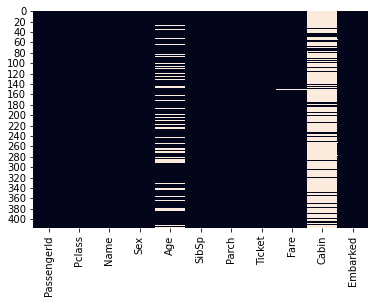

In [8]:
sns.heatmap(test.isna(),cbar=False)
plt.show()

In [9]:
test=test.dropna(subset=['Fare'])

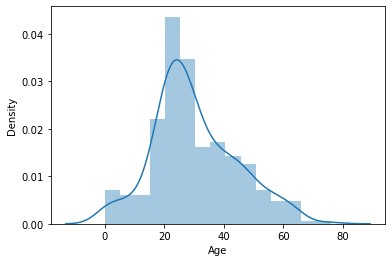

In [10]:
sns.distplot(test['Age'])
plt.show()

In [11]:
test['Age'].describe()

count    331.000000
mean      30.181269
std       14.104573
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [15]:
def impute(df,variable,median):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_random'] = df[variable]
    sample = df[variable].dropna().sample(df[variable].isna().sum(),random_state=10)
    sample.index = df[df[variable].isna()].index
    df.loc[df[variable].isna(),variable+'_random']=sample

In [16]:
impute(test,'Age',test.Age.median())

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_random
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0,47.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0,62.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0,22.0


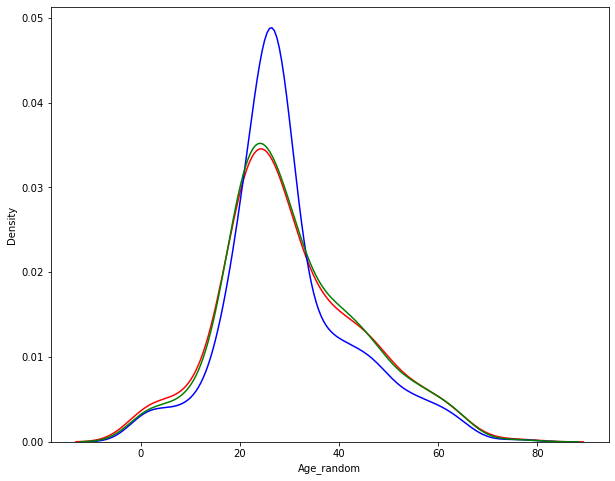

In [17]:
plt.figure(figsize=(10,8))
sns.distplot(test['Age'].dropna(),hist=False,color='red')
sns.distplot(test['Age_median'].dropna(),hist=False,color='blue')
sns.distplot(test['Age_random'].dropna(),hist=False,color='green')
plt.show()

In [18]:
df_model = test.drop(['Age','Age_median','Cabin'],1)
df_model.reset_index(inplace=True,drop=True)
df_model

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_random
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,S,47.0
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q,62.0
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S,22.0
...,...,...,...,...,...,...,...,...,...,...
412,1305,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,8.0500,S,23.0
413,1306,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,108.9000,C,39.0
414,1307,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,7.2500,S,38.5
415,1308,3,"Ware, Mr. Frederick",male,0,0,359309,8.0500,S,42.0


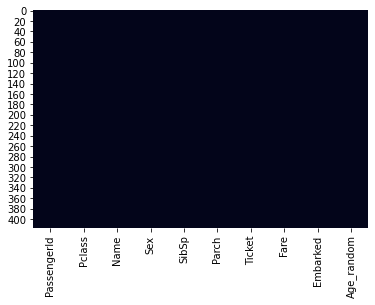

In [19]:
sns.heatmap(df_model.isna(),cbar=False)
plt.show()

In [22]:
test[['Pclass','SibSp','Parch']] = test[['Pclass','SibSp','Parch']].astype('O')
test.dtypes

PassengerId      int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp           object
Parch           object
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Age_median     float64
Age_random     float64
dtype: object

In [24]:
df_num = test.select_dtypes(include=np.number)
df_cat = test.select_dtypes(exclude=np.number)

for i in df_cat.drop(['Name','Ticket','Cabin'],1).columns:
    res= pd.DataFrame()
    res=pd.DataFrame({'Counts':df_cat[i].value_counts(),'Percentage':df_cat[i].value_counts(normalize=True)*100})
    print(i)
    print(res)
    print('\n')

Pclass
   Counts  Percentage
3     217   52.038369
1     107   25.659472
2      93   22.302158


Sex
        Counts  Percentage
male       265   63.549161
female     152   36.450839


SibSp
   Counts  Percentage
0     282   67.625899
1     110   26.378897
2      14    3.357314
3       4    0.959233
4       4    0.959233
8       2    0.479616
5       1    0.239808


Parch
   Counts  Percentage
0     323   77.458034
1      52   12.470024
2      33    7.913669
3       3    0.719424
4       2    0.479616
9       2    0.479616
5       1    0.239808
6       1    0.239808


Embarked
   Counts  Percentage
S     269   64.508393
C     102   24.460432
Q      46   11.031175




In [28]:
df_model[['Pclass','SibSp','Parch']] = df_model[['Pclass','SibSp','Parch']].astype('O')

In [30]:
df_model[df_model['Parch']==9]

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_random
341,1234,3,"Sage, Mr. John George",male,1,9,CA. 2343,69.55,S,38.0
364,1257,3,"Sage, Mrs. John (Annie Bullen)",female,1,9,CA. 2343,69.55,S,30.0


In [31]:
df_model=df_model[df_model['Parch']!=9]

In [34]:
df_final = df_model.drop(['PassengerId','Name','Ticket'],1)

df_encoded = pd.get_dummies(df_final,drop_first=True)

df_encoded=df_encoded.reset_index(drop=True)

df_encoded

,Fare,Age_random,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,7.8292,34.5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,7.0000,47.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,9.6875,62.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,8.6625,27.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,12.2875,22.0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,8.0500,23.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
411,108.9000,39.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
412,7.2500,38.5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
413,8.0500,42.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
df_encoded.to_csv('Cleaned_test.csv')